In [1]:
cd ..

/home/jovyan/gt_ml_project_1


In [2]:
%run __init__.py

In [4]:
adult_train_data = pd.read_pickle('data/adult_train_data.p')
adult_train_labels = pd.read_pickle('data/adult_train_labels.p')
madelon_train_data = pd.read_pickle('data/madelon_train_data.p')
madelon_train_labels = pd.read_pickle('data/madelon_train_labels.p')

# Adult

In [13]:
adult_dtypes = adult_train_data.dtypes
adult_numeric_features = list(adult_dtypes[adult_dtypes==int].index)
adult_categorical_features = list(adult_dtypes[adult_dtypes == 'category'].index)
adult_numeric_features, adult_categorical_features


(['age',
  'fnlwgt',
  'education-num',
  'capital-gain',
  'capital-loss',
  'hours-per-week'],
 ['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native-country'])

### Summary Statistics for Numerical Features

In [14]:
skew_values = list()
adult_train_stats = adult_train_data.describe().T
for num_col in adult_train_stats.index:
    num_col_skew = stats.skew(adult_train_data[num_col])
    skew_values.append(num_col_skew)
adult_train_stats['skew'] = skew_values
adult_train_stats.drop(['count','25%','50%','75%'],axis=1)

,mean,std,min,max,skew
age,38.569702,13.617063,17.0,90.0,0.560017
fnlwgt,190222.131507,105715.813304,13769.0,1484705.0,1.471826
education-num,10.078138,2.586963,1.0,16.0,-0.328824
capital-gain,1038.676878,7131.690393,0.0,99999.0,12.288018
capital-loss,87.143672,403.316592,0.0,4356.0,4.628847
hours-per-week,40.468629,12.397220,1.0,99.0,0.253956


### Distribution Plots for Numerical Features

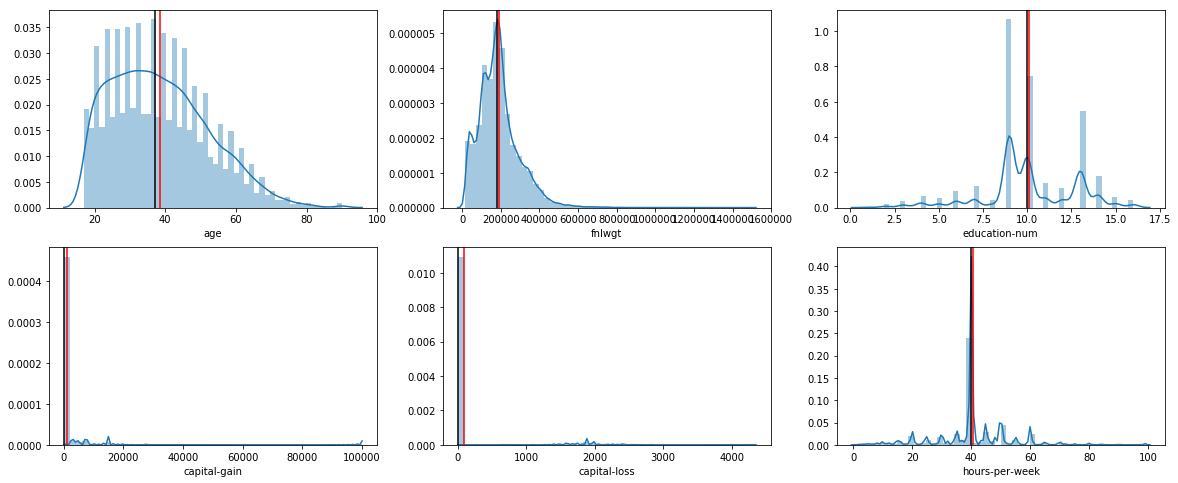

In [15]:
fig = plt.figure(figsize=(20,8))

for i, num_col in enumerate(adult_numeric_features):
    fig.add_subplot(2,3,1+i)
    sns.distplot(adult_train_data[num_col])
    
    mean_value = adult_train_data[num_col].mean()
    plt.axvline(mean_value, c='red')
    
    median_value = adult_train_data[num_col].median()
    plt.axvline(median_value, c='black')

This is showing that the value `99999` is not just an outlier.

In [16]:
high_value_count = (adult_train_data['capital-gain'] == 99999).sum()
high_value_count

113

In [17]:
n_adult_train = adult_train_data.count().max()

In [18]:
high_value_count/n_adult_train

0.0045071995532687172

#### Correlation Between Capital Gain Outlier and Target

Every instance that has this high value is the same class meaning that this value is very important for classification.

In [19]:
adult_train_labels[adult_train_data['capital-gain'] == 99999].sum()

113

### Correlations

In [20]:
adult_train_numeric_corr = adult_train_data[adult_numeric_features].corr()

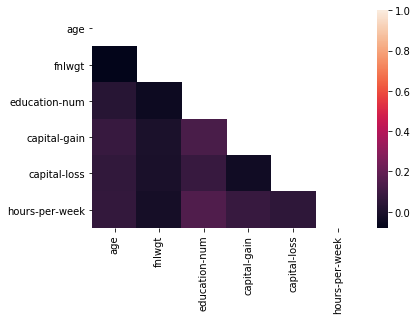

In [21]:
mask = np.zeros_like(adult_train_numeric_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(adult_train_numeric_corr, mask=mask)

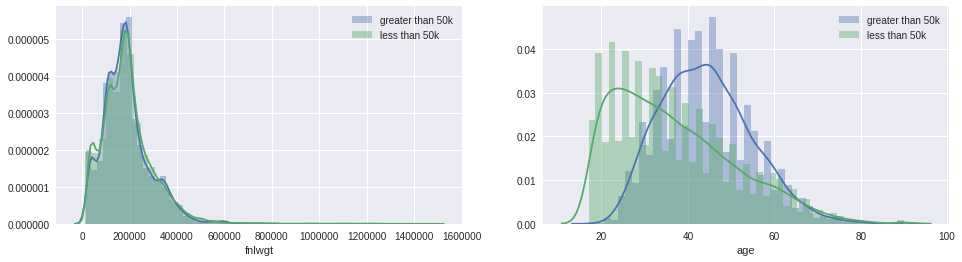

In [6]:
greater_than_50k = adult_train_labels == 1
less_than_50k = adult_train_labels == 0
fig = plt.figure(figsize=(16,4))
fig.add_subplot(1,2,1)
sns.distplot(adult_train_data['fnlwgt'][greater_than_50k], label='greater than 50k')
sns.distplot(adult_train_data['fnlwgt'][less_than_50k], label='less than 50k')
plt.legend()
fig.add_subplot(1,2,2)
sns.distplot(adult_train_data['age'][greater_than_50k], label='greater than 50k')
sns.distplot(adult_train_data['age'][less_than_50k], label='less than 50k')
plt.legend()

##### Based on this we will drop this feature.

## Categorical Features

In [ ]:
adult_train_with_label = adult_train_data.copy()
adult_train_with_label['label'] = adult_train_labels

In [ ]:
ct = pd.crosstab(index = adult_train_with_label['workclass'], columns=adult_train_with_label['label'])
ct.columns = ['<=$50k','>$50K']
ct

#### `workclass` subplot

In [ ]:
fig = plt.figure(figsize=(20,6))
sns.countplot('workclass', hue='label', data=adult_train_with_label)

#### `education` subplot

In [ ]:
fig = plt.figure(figsize=(20,6))
sns.countplot('education', hue='label', data=adult_train_with_label)

In [ ]:
fig = plt.figure(figsize=(20,6))
sns.countplot('marital-status', hue='label', data=adult_train_with_label)

In [ ]:
fig = plt.figure(figsize=(20,6))
sns.countplot('occupation', hue='label', data=adult_train_with_label)

In [ ]:
fig = plt.figure(figsize=(20,6))
sns.countplot('relationship', hue='label', data=adult_train_with_label)

In [ ]:
fig = plt.figure(figsize=(20,6))
sns.countplot('race', hue='label', data=adult_train_with_label)

In [ ]:
fig = plt.figure(figsize=(20,6))
sns.countplot('sex', hue='label', data=adult_train_with_label)

In [ ]:
fig = plt.figure(figsize=(20,6))
sns.countplot('native-country', hue='label', data=adult_train_with_label)
plt.xticks(rotation=45, ha='right');

In [ ]:
fig = plt.figure(figsize=(20,6))
sns.countplot('native-country', hue='label', data=adult_train_with_label)
plt.xticks(rotation=45, ha='right');
plt.ylim(0,150)

# Madelon

In [24]:
madelon_dtypes = madelon_train_data.dtypes
madelon_numeric_features = list(madelon_dtypes[madelon_dtypes==int].index)
madelon_categorical_features = list(madelon_dtypes[madelon_dtypes == 'category'].index)
len(madelon_numeric_features), len(madelon_categorical_features)

(500, 0)

### Summary Statistics for Numerical Features

In [25]:
skew_values = list()
madelon_train_stats = madelon_train_data.describe().T
for num_col in madelon_train_stats.index:
    num_col_skew = stats.skew(madelon_train_data[num_col])
    skew_values.append(num_col_skew)
madelon_train_stats['skew'] = skew_values
madelon_train_stats = madelon_train_stats.drop(['count','25%','50%','75%'],axis=1)


In [26]:
madelon_train_stats[madelon_train_stats['min'] < 300]

,mean,std,min,max,skew
56,479.6940,41.616780,288.0,644.0,0.043453
64,497.9675,89.391095,214.0,768.0,-0.035671
105,502.0880,134.554564,0.0,999.0,-0.026163
153,501.8990,98.149490,182.0,814.0,0.016018
336,480.8740,104.541100,180.0,828.0,-0.019437
338,500.4720,96.954852,207.0,829.0,0.093502
362,477.6885,41.921011,293.0,638.0,-0.074904
433,498.7270,69.033610,263.0,719.0,0.011009
442,495.7895,97.286389,207.0,794.0,-0.057872
453,481.4260,113.467290,84.0,807.0,-0.127095


In [ ]:
fig = plt.figure(figsize=(15,4))
fig.add_subplot(1,4,1)
sns.boxplot(madelon_train_stats['mean'])
fig.add_subplot(1,4,2)
sns.boxplot(madelon_train_stats['std'])
fig.add_subplot(1,4,3)
sns.boxplot(madelon_train_stats['min'])
fig.add_subplot(1,4,4)
sns.boxplot(madelon_train_stats['max'])


### Distribution Plots for Numerical Features

In [ ]:
fig = plt.figure(figsize=(20,20))

for num_col in madelon_numeric_features[:10]:
    sns.distplot(madelon_train_data[num_col])
    
plt.ylim(0, 0.2)

### Correlations

In [ ]:
madelon_train_numeric_corr = madelon_train_data[madelon_numeric_features].corr()

In [ ]:
mask = np.zeros_like(madelon_train_numeric_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(madelon_train_numeric_corr, mask=mask)